## English Premier Leauge Analysis

In [61]:
#importing Useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
# Importing Data

epl = pd.read_csv('results.csv',encoding='unicode_escape')

In [39]:
# Shape of the Dataset

rows, columns = epl.shape
print("Number of rows: ", rows)
print("Number of columns: ", columns)

Number of rows:  11113
Number of columns:  23


In [40]:
# Column names

print(epl.columns)

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


### Column Descriptions

Below is a description of the columns in the English Premier League dataset:

- **Season**: The match season in which the game took place.
- **DateTime**: The date and time of the match in the format yyyy-mm-dd hh:mm:ss.
- **HomeTeam**: The home team participating in the match.
- **AwayTeam**: The away team participating in the match.
- **FTHG**: Full-Time Home Team Goals - The number of goals scored by the home team by the end of the match.
- **FTAG**: Full-Time Away Team Goals - The number of goals scored by the away team by the end of the match.
- **FTR**: Full-Time Result - The result of the match (H=Home Win, D=Draw, A=Away Win).
- **HTHG**: Half-Time Home Team Goals - The number of goals scored by the home team at half-time.
- **HTAG**: Half-Time Away Team Goals - The number of goals scored by the away team at half-time.
- **HTR**: Half-Time Result - The result of the match at half-time (H=Home Win, D=Draw, A=Away Win).
- **Referee**: The referee officiating the match.
- **HS**: Home Team Shots - The total number of shots taken by the home team.
- **AS**: Away Team Shots - The total number of shots taken by the away team.
- **HST**: Home Team Shots on Target - The number of shots on target by the home team.
- **AST**: Away Team Shots on Target - The number of shots on target by the away team.
- **HC**: Home Team Corners - The number of corners awarded to the home team.
- **AC**: Away Team Corners - The number of corners awarded to the away team.
- **HF**: Home Team Fouls Committed - The number of fouls committed by the home team.
- **AF**: Away Team Fouls Committed - The number of fouls committed by the away team.
- **HY**: Home Team Yellow Cards - The number of yellow cards shown to players of the home team.
- **AY**: Away Team Yellow Cards - The number of yellow cards shown to players of the away team.
- **HR**: Home Team Red Cards - The number of red cards shown to players of the home team.
- **AR**: Away Team Red Cards - The number of red cards shown to players of the away team.


In [41]:
# Column Datatypes

epl.dtypes

Season       object
DateTime     object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HC          float64
AC          float64
HF          float64
AF          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [42]:
# Changing the datatype of DateTime column from object to datetime64[ns]

epl['DateTime'] = pd.to_datetime(epl['DateTime']) 

In [43]:
# Statistical Description of the data

epl.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,11113.0,1.518222,1.301981,0.0,1.0,1.0,2.0,9.0
FTAG,11113.0,1.141456,1.135907,0.0,0.0,1.0,2.0,9.0
HTHG,10189.0,0.684758,0.836299,0.0,0.0,0.0,1.0,5.0
HTAG,10189.0,0.501031,0.722299,0.0,0.0,0.0,1.0,5.0
HS,8289.0,13.503921,5.258636,0.0,10.0,13.0,17.0,43.0
AS,8289.0,10.644589,4.583010,0.0,7.0,10.0,13.0,30.0
HST,8289.0,6.117264,3.327521,0.0,4.0,6.0,8.0,24.0
AST,8289.0,4.768247,2.792965,0.0,3.0,4.0,6.0,20.0
HC,8289.0,6.081795,3.095070,0.0,4.0,6.0,8.0,20.0
AC,8289.0,4.784292,2.728954,0.0,3.0,4.0,6.0,19.0


### Exploratory Data Analysis

In [44]:
# How many matches were played in each season?

epl.groupby(['Season'])['HomeTeam'].count().reset_index(name="Total Matches")

,Season,Total Matches
0,1993-94,462
1,1994-95,462
2,1995-96,380
3,1996-97,380
4,1997-98,380
5,1998-99,380
6,1999-00,380
7,2000-01,380
8,2001-02,380
9,2002-03,380


In [45]:
# Which teams were involved in the most matches?

home_team_matches = epl['HomeTeam'].value_counts()

away_team_matches = epl['AwayTeam'].value_counts()
away_team_matches

most_matches = home_team_matches.add(away_team_matches,fill_value=0)

most_team_involvment = most_matches[most_matches==most_matches.max()]

print("Team(s) involved in the most matches:")
print(most_team_involvment)


Team(s) involved in the most matches:
Liverpool     1103
Man United    1103
Tottenham     1103
Name: count, dtype: int64


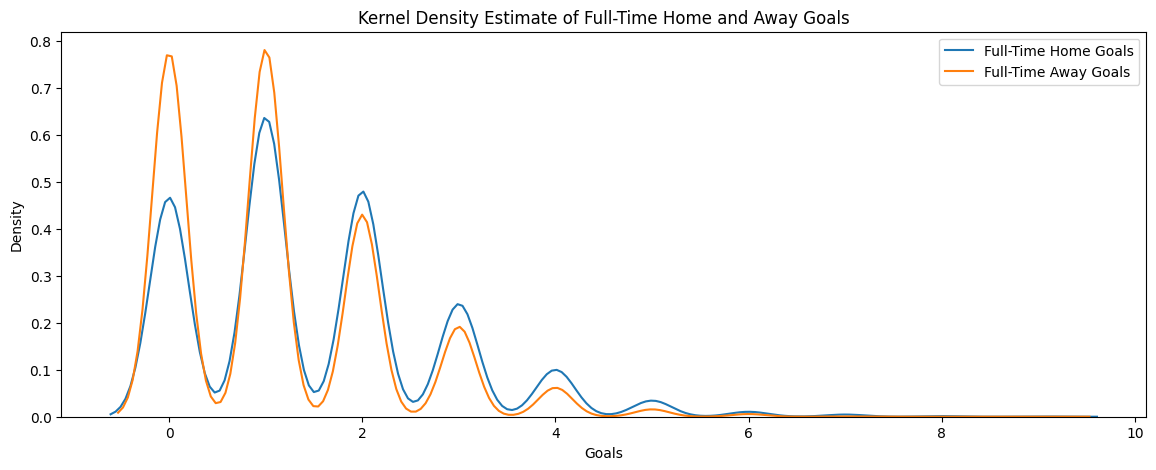

In [46]:
# What is the distribution of full-time home goals (FTHG) and away goals (FTAG)?

plt.figure(figsize=(14,5))
sns.kdeplot(data=epl['FTHG'], label='Full-Time Home Goals')
sns.kdeplot(data=epl['FTAG'], label='Full-Time Away Goals')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Full-Time Home and Away Goals')
plt.legend()
plt.show()


In [47]:
# How many matches ended in a home win (FTR = 'H'), away win (FTR = 'A'), or draw (FTR = 'D')?

result_counts = epl['FTR'].value_counts()

print("Number of matches that ended in:")
print("Home Win (FTR = 'H'): ", result_counts['H'])
print("Away Win (FTR = 'A'): ", result_counts['A'])
print("Draw (FTR = 'D'): ", result_counts['D'])

Number of matches that ended in:
Home Win (FTR = 'H'):  5088
Away Win (FTR = 'A'):  3161
Draw (FTR = 'D'):  2864


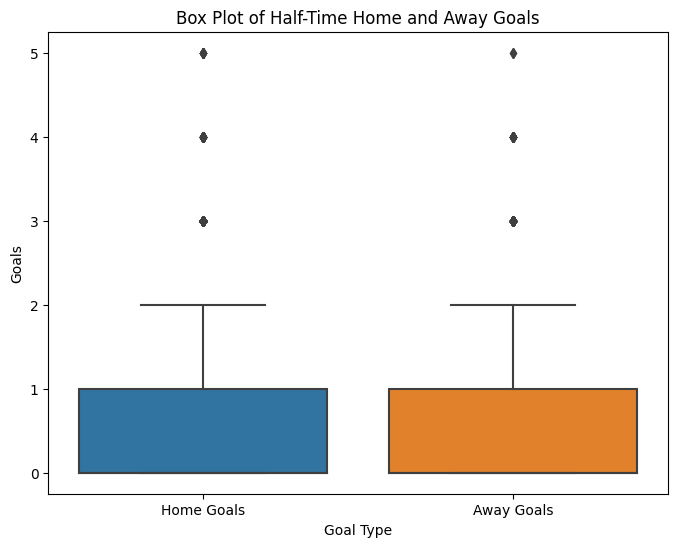

In [48]:
# What is the distribution of half-time home goals (HTHG) and away goals (HTAG)?

plt.figure(figsize=(8, 6))
sns.boxplot(data=epl[['HTHG', 'HTAG']])
plt.xlabel('Goal Type')
plt.ylabel('Goals')
plt.title('Box Plot of Half-Time Home and Away Goals')
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.show()


In [49]:
# How does the half-time result (HTR) correlate with the full-time result (FTR)?

correlation = pd.crosstab(epl['FTR'], epl['HTR'],normalize='index')
correlation

HTR,A,D,H
FTR,,,
A,0.571134,0.368041,0.060825
D,0.184312,0.619397,0.196291
H,0.049243,0.335110,0.615647


In [66]:
# Who are the most frequent referees and how do they impact match outcomes?

referee_counts = epl['Referee'].value_counts()
top_referees = referee_counts.head(5).index

top_referee_data = epl[epl['Referee'].isin(top_referees)]

# Creating a cross-tabulation of referee and match outcomes
referee_outcome_counts = pd.crosstab(top_referee_data['Referee'], top_referee_data['FTR'], normalize='index')

# Reset index for Plotly plot compatibility
referee_outcome_counts = referee_outcome_counts.reset_index()

# Creating a grouped bar chart using Plotly
fig = px.bar(referee_outcome_counts, x='Referee', y=['A', 'D', 'H'],
             title='Impact of Top 5 Referees on Match Outcomes',
             labels={'Referee': 'Referee', 'value': 'Match Result Ratio'},
             color_discrete_map={'A': 'pink', 'D': 'blue', 'H': 'green'},
             barmode='group')

fig.update_traces(legendgroup=True, name='Away Win', selector=dict(name='A'))
fig.update_traces(legendgroup=True, name='Draw', selector=dict(name='D'))
fig.update_traces(legendgroup=True, name='Home Win', selector=dict(name='H'))
fig.update_layout(legend_title_text='Result')

fig.update_layout(xaxis_tickangle=-45)
fig.show()